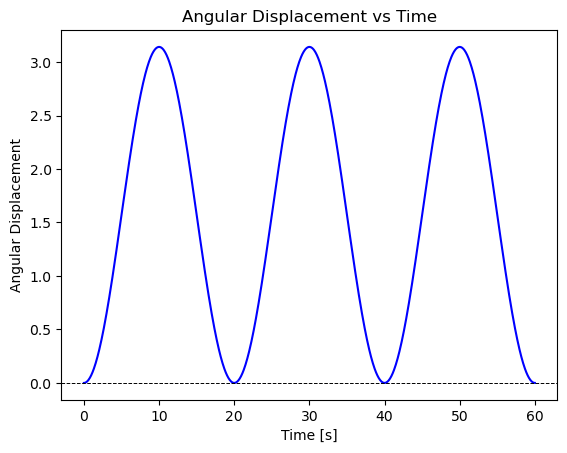

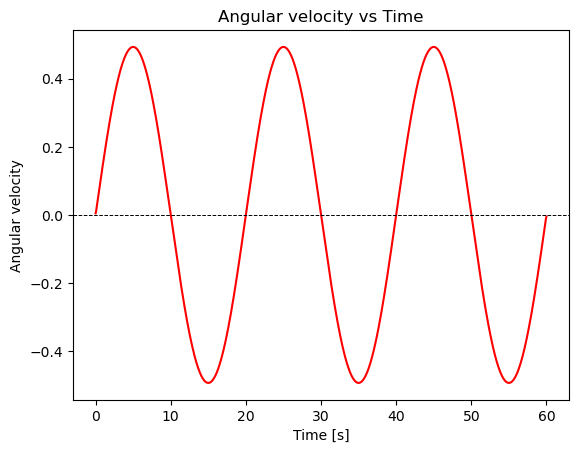

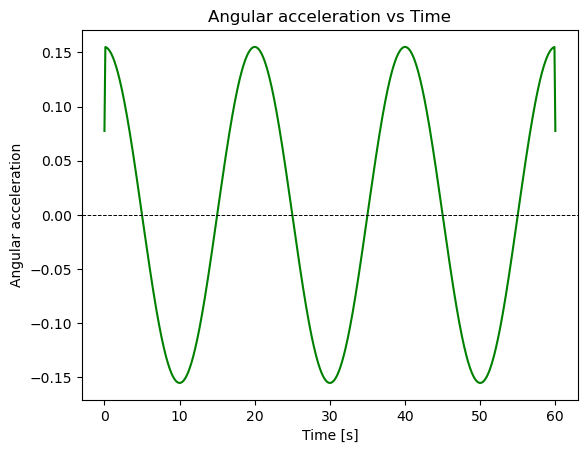

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

T = 60  # Full cycle time (seconds) from 0 to 180-degree rotation

# Time array
time = np.linspace(0, T, 1000)  # Time steps

# Adjusted angular displacement, velocity, and acceleration
theta = (np.pi / 2)* np.sin(np.pi/10 * (time - 5)) + np.pi/2  # Angular displacement

plt.plot(time, theta, color="blue")
plt.title("Angular Displacement vs Time")
plt.xlabel("Time [s]")
plt.ylabel("Angular Displacement")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Zero line for reference
plt.show()

omega = np.gradient(theta, time)  # Angular velocity

plt.plot(time, omega, color="red")
plt.title("Angular velocity vs Time")
plt.xlabel("Time [s]")
plt.ylabel("Angular velocity")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Zero line for reference
plt.show()

alpha = np.gradient(omega, time)  # Angular acceleration

plt.plot(time, alpha, color="green")
plt.title("Angular acceleration vs Time")
plt.xlabel("Time [s]")
plt.ylabel("Angular acceleration")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Zero line for reference
plt.show()



 Below is an illustration of I_combined:
 
 \begin{equation}
I_{combined} =
   \left\{\begin{array}{lr}
       I_{forward}, & floor(\frac{t}{10}) \in \{0,2,4,6,8,...\} \\
       I_{backward}, & floor(\frac{t}{10}) \in \{1,3,5,7,9,...\}
    \end{array}\right.
 \end{equation}

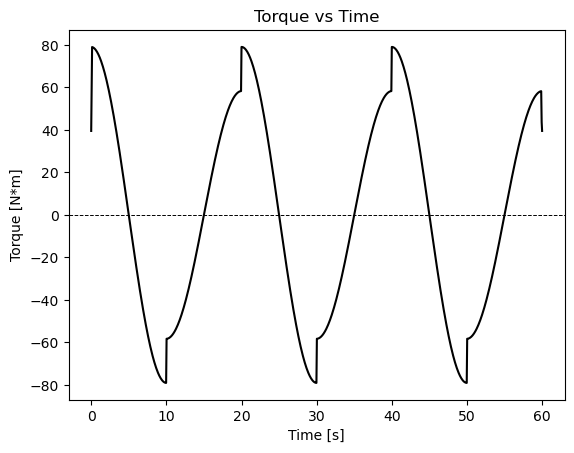

In [142]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Constants
L = 1.92238       # Length of the arm [m]
m_tip = 36.29  # Mass at the tip [kg]
m_arm = 305.4  # Mass of the arm link [kg]
g = 9.81  # Gravitational acceleration (m/s^2)

T = 60  # Full cycle time (seconds) from 0 to 180-degree rotation

# Time array
time = np.linspace(0, T, 1000)  # Time steps

I_link = (1/3) * m_arm * L**2  # Moment of inertia of the link
I_tip = m_tip * L**2  # Moment of inertia of the tip mass

# Function for computing actual moment of intertia at given time
def I_actual(time):
    # Arm and weight
    return_list = []  # Using empty square brackets
    for t in time:
        if math.floor(t/10) % 2 == 0: # if floor(t/10) is even (0-1,2-3,4-5,...)
            return_list.append(I_link + I_tip)
        # Just arm
        else: # if floor(t/10) is odd (1-2,3-4,5-6,...)
            return_list.append(I_link)
    return return_list
        
theta = (np.pi / 2)* np.sin(np.pi/10 * (time - 5)) + np.pi/2  # Angular displacement
omega = np.gradient(theta, time)  # Angular velocity
alpha = np.gradient(omega, time)  # Angular acceleration

torque = I_actual(time) * alpha 

plt.plot(time, torque, color="black")
plt.title("Torque vs Time")
plt.xlabel("Time [s]")
plt.ylabel("Torque [N*m]")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Zero line for reference
plt.show()




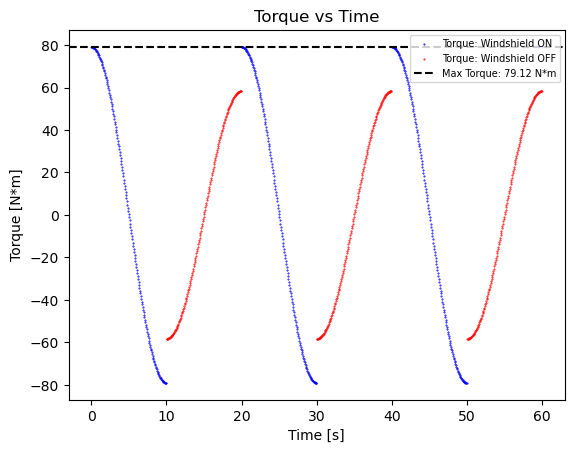

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Constants
L = 1.92238       # Length of the arm [m]
m_tip = 36.29  # Mass at the tip [kg]
m_arm = 305.4  # Mass of the arm link [kg]
g = 9.81  # Gravitational acceleration (m/s^2)

I_link = (1/3) * m_arm * L**2  # Moment of inertia of the link
I_tip = m_tip * L**2  # Moment of inertia of the tip mass

T = 60  # Full cycle time (seconds) from 0 to 180-degree rotation

# Time arrays
time = np.linspace(0, T, 1000)  # Time steps

time_forward = []
time_backward = []

for t in time:
    # if floor(t/10) is even
    if math.floor(t/10) % 2 == 0: 
        time_forward.append(t)
        #time_backward.append(0)
    
    # if floor(t/10) is odd
    else: 
        #time_forward.append(0)
        time_backward.append(t)

# Define theta as a function of time t
def theta(t):
    return (np.pi / 2) * np.sin(np.pi / 10 * (t - 5)) + np.pi / 2

# Define omega as a function of time t
def omega(t):
    return_list = []
    for t in time:
        value = (np.pi**2 / 10) * np.cos(np.pi / 10 * (t - 5))
        return_list.append(value)
    return return_list

# Define alpha as a function of time t
def alpha(time):
    return_list = []
    for t in time:
        value = (-np.pi**3 / 200) * np.sin(np.pi / 10 * (t - 5))
        return_list.append(value)
    return return_list


# Intertia and torque functions
I_forward = I_link + I_tip
I_backward = I_link

torque_forward = [a * I_forward for a in alpha(time_forward)]
torque_backward = [a * I_backward for a in alpha(time_backward)]
torque_combined = torque_forward + torque_backward

# Create a scatter plot for each dataset
plt.scatter(time_forward, torque_forward, label="Torque: Windshield ON", color="blue", s=0.2)
plt.scatter(time_backward, torque_backward, label="Torque: Windshield OFF", color="red", s=0.2)

# Add labels, legend, and title
plt.title("Torque vs Time")
plt.xlabel("Time [s]")
plt.ylabel("Torque [N*m]")
plt.axhline(np.max(torque_combined), color='black', linestyle='--',label=f"Max Torque: {np.max(torque_combined):.2f} N*m")

plt.legend(fontsize = '7')

# Show plot
plt.show()


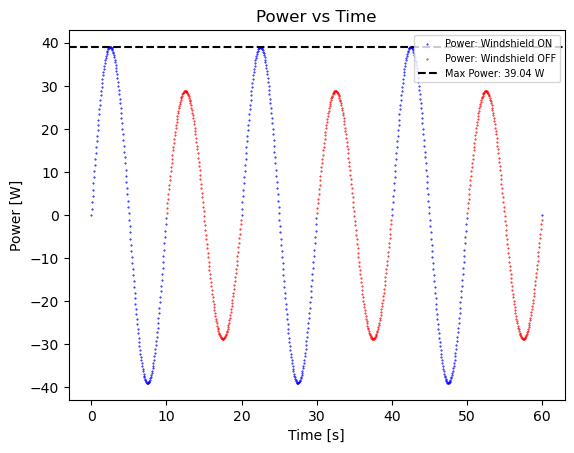

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Constants
L = 1.92238      # Length of the arm [m]
m_tip = 36.29  # Mass at the tip [kg]
m_arm = 305.4  # Mass of the arm link [kg]
g = 9.81  # Gravitational acceleration (m/s^2)

I_link = (1/3) * m_arm * L**2  # Moment of inertia of the link
I_tip = m_tip * L**2  # Moment of inertia of the tip mass

T = 60  # Full cycle time (seconds) from 0 to 180-degree rotation

# Time arrays
time = np.linspace(0, T, 1000)  # Time steps

time_forward = []
time_backward = []

for t in time:
    # if floor(t/10) is even
    if math.floor(t/10) % 2 == 0: 
        time_forward.append(t)
        #time_backward.append(0)
    
    # if floor(t/10) is odd
    else: 
        #time_forward.append(0)
        time_backward.append(t)

# Define theta as a function of time t
def theta(time):
    return_list = []
    for t in time:
        value = (np.pi / 2) * np.sin(np.pi / 10 * (t - 5)) + np.pi / 2
        return_list.append(value)
    return return_list

# Define omega as a function of time t
def omega(time):
    return_list = []
    for t in time:
        value = (np.pi**2 / 10) * np.cos(np.pi / 10 * (t - 5))
        return_list.append(value)
    return return_list

# Define alpha as a function of time t
def alpha(time):
    return_list = []
    for t in time:
        value = (-np.pi**3 / 200) * np.sin(np.pi / 10 * (t - 5))
        return_list.append(value)
    return return_list

# Intertia and torque functions
I_forward = I_link + I_tip
I_backward = I_link

torque_forward = [a * I_forward for a in alpha(time_forward)]
torque_backward = [a * I_backward for a in alpha(time_backward)]

# Torque & Power calculations for the forward motion
power_forward = [torque * omega for torque,omega in zip(torque_forward, omega(time_forward))]
power_backward = [torque * omega for torque,omega in zip(torque_backward, omega(time_backward))]
power_combined = power_forward + power_backward

# Create a scatter plot for each dataset
plt.scatter(time_forward, power_forward, label="Power: Windshield ON", color="blue", s=0.2)
plt.scatter(time_backward, power_backward, label="Power: Windshield OFF", color="red", s=0.2)
plt.axhline(np.max(power_combined), color='black', linestyle='--',label=f"Max Power: {np.max(power_combined):.2f} W")

# Add labels, legend, and title
plt.title("Power vs Time")
plt.xlabel("Time [s]")
plt.ylabel("Power [W]")
plt.legend(fontsize = '7')